In [1]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
sys.path.append('../../utils')

from tomography import coherent_state_tomography as cst
from visualization import state_visualization as state_vis


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [9]:
# I am uncertain about whether or not using a small square is actually a bad idea, so I'm going to try
# mle with a well-represented small square of halfwidth 2

max_x = 4
mesh_size = 0.5
dim = 40 # I'm actually skeptical that this is even high enough really
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
target_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
target_state = target_state * target_state.dag()

# Make the noisy POVM
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)
noiseless_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim)

# We'll make the data with high dimensional states to ensure it's 'close to real'
high_dim = 200
clean_target_state = (qutip.basis(high_dim, 0) + qutip.basis(high_dim, 1)).unit()
clean_target_state = clean_target_state * clean_target_state.dag()
clean_ideal_target_Q_function = qutip.qfunc(clean_target_state, xs, ps, g=2)
clean_noisy_target_Q_function = cst.evaluate_thermally_noisy_Q_function(clean_target_state, 
                                                                  number_of_noise_photons, 
                                                                  xs, 
                                                                  ps)

# Also make low dimensional data for testing
ideal_target_Q_function = qutip.qfunc(target_state, xs, ps, g=2)
noisy_target_Q_function = cst.evaluate_thermally_noisy_Q_function(target_state, 
                                                                  number_of_noise_photons, 
                                                                  xs, 
                                                                  ps)


# And now we'll try to reconstruct the input state
number_of_mle_iterations = 15000
s = time.time()
reconstructed_state, fidelities = cst.perform_coherent_state_MLE(
                                    noisy_povm,
                                    noisy_target_Q_function, 
                                    number_of_mle_iterations,
                                    rho_ideal=target_state)
e = time.time()
print('Time for MLE reconstruction for max_x = ' + str(max_x) + ': ' + str(e - s) + ' s')

Time for MLE reconstruction for max_x = 4: 2155.7558419704437 s


<IPython.core.display.Javascript object>


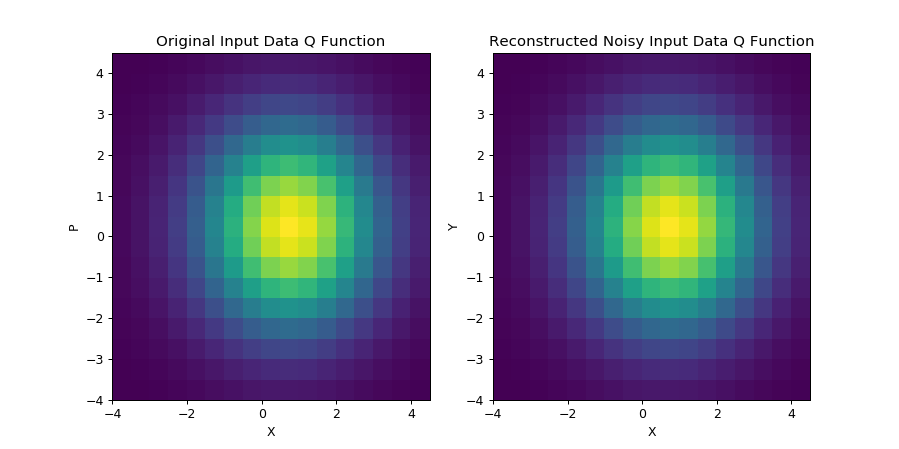

<IPython.core.display.Javascript object>


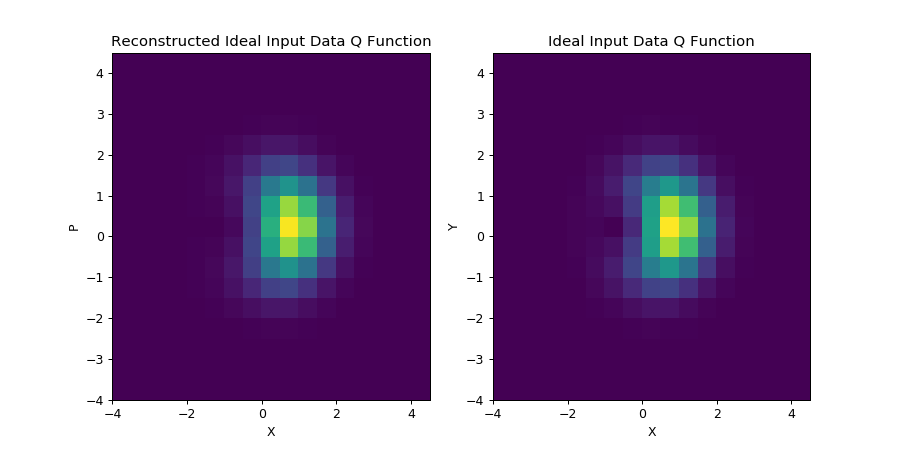

<IPython.core.display.Javascript object>


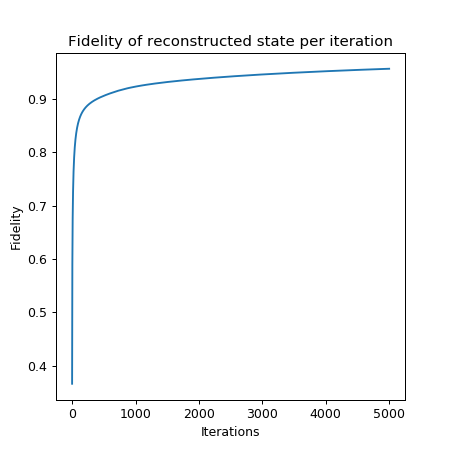

In [7]:
cst.plot_coherent_state_tomography_Q_functions(noisy_target_Q_function,
                                               reconstructed_state,
                                               xs,
                                               ps,
                                               noise_photon_number=number_of_noise_photons,
                                               ideal_state=target_state,
                                               fidelities=fidelities)

<IPython.core.display.Javascript object>


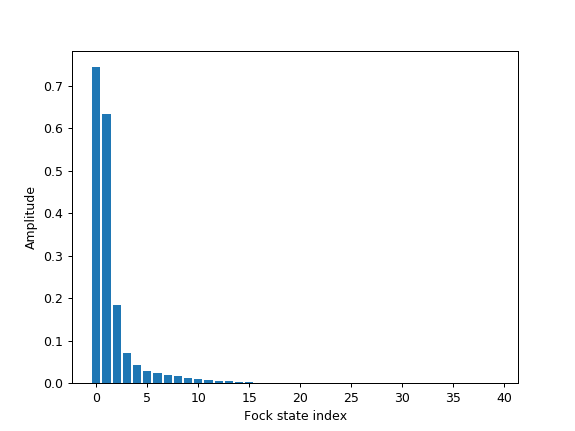

In [8]:
state_vis.plot_fock_basis_amplitudes(reconstructed_state)

In [12]:
max_x = 4
mesh_size = 0.25
dim = 150 # I'm actually skeptical that this is even high enough really
number_of_noise_photons = 4.4
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)
target_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
target_state = target_state * target_state.dag()

# Make the noisy POVM
noisy_povm, alphas, xs, ps = cst.generate_coherent_state_POVM(max_x, 
                                                              mesh_size, 
                                                              dim, 
                                                              noise_base=noise_state)

G = cst.sum_povm_elements(noisy_povm)
G_inv = cst.extract_G_inv_from_POVM(noisy_povm)
g = np.matrix(G)
g_inv = np.matrix(G_inv)
g_inv = np.linalg.inv(g)
np.allclose(np.dot(g, g_inv), np.identity(g.shape[0]))

True

In [13]:
state_vis.plot_fock_basis_amplitudes(input_state)

NameError: name 'input_state' is not defined

In [15]:
print(len(xs))

34
